In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
from IPython.display import HTML
import plotly.express as px

In [ ]:
df1 = pd.read_csv("/content/calories.csv")
df2 = pd.read_csv("/content/exercise.csv")


**Exploratory Data Analysis(EDA)**

In [ ]:
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
df1.shape

(15000, 2)

**Overall information of dataset**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [ ]:
df = pd.concat([df2,df1["Calories"]],axis=1)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
df.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [ ]:
df.shape

(15000, 9)

In [ ]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

**Dataset's Overall Statistic**

In [ ]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
df.drop(columns = ["User_ID"],axis=1,inplace =True)

In [ ]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
df.value_counts()

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
female  28   164.0   59.0    9.0       90.0        39.5       40.0        2
        20   132.0   41.0    5.0       85.0        39.3       20.0        1
male    31   192.0   93.0    30.0      117.0       40.7       239.0       1
             190.0   93.0    3.0       93.0        38.8       13.0        1
                             13.0      94.0        39.8       59.0        1
                                                                         ..
female  50   156.0   55.0    23.0      98.0        40.8       132.0       1
             157.0   60.0    6.0       91.0        39.4       29.0        1
             158.0   55.0    24.0      105.0       40.7       155.0       1
                     58.0    17.0      95.0        40.1       91.0        1
male    79   207.0   119.0   14.0      94.0        39.9       103.0       1
Name: count, Length: 14999, dtype: int64

In [ ]:
print("This dataset has " , df.shape[0] ," instances and ",  df.shape[1] , " columns.")


This dataset has  15000  instances and  8  columns.


In [ ]:
print("Columns : ")
for i , column in zip(range(len(df.columns)) ,df.columns):
  print("\t" , i + 1 , "." ,  column)


Columns : 
	 1 . Gender
	 2 . Age
	 3 . Height
	 4 . Weight
	 5 . Duration
	 6 . Heart_Rate
	 7 . Body_Temp
	 8 . Calories


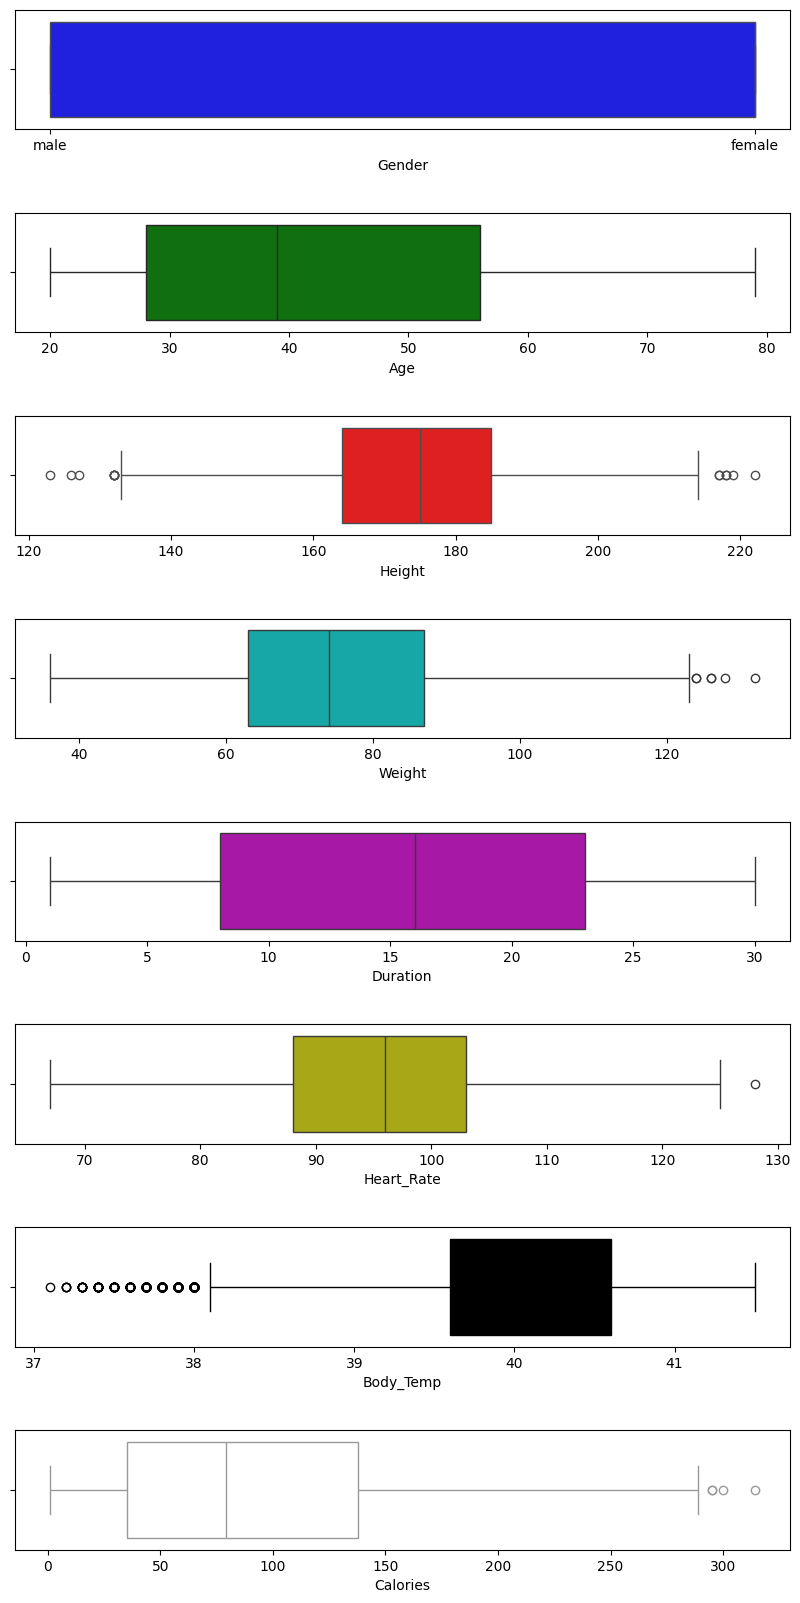

In [ ]:
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(df.columns) , 1 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension
for i , column in zip(range(len(df.columns)) , df.columns):
  try:
    sns.boxplot(data = df , x = column , color = c[i] , ax = axes[i])
  except:
    fig1.delaxes(axes[i])
    continue


In [ ]:
exercise_train_data , exercise_test_data = train_test_split(df , test_size = 0.2 , random_state = 1)
print("Shape of training data : " , exercise_train_data.shape)
print("Shape of test data : " , exercise_test_data.shape)


Shape of training data :  (12000, 8)
Shape of test data :  (3000, 8)


**Dataset's Distribution**

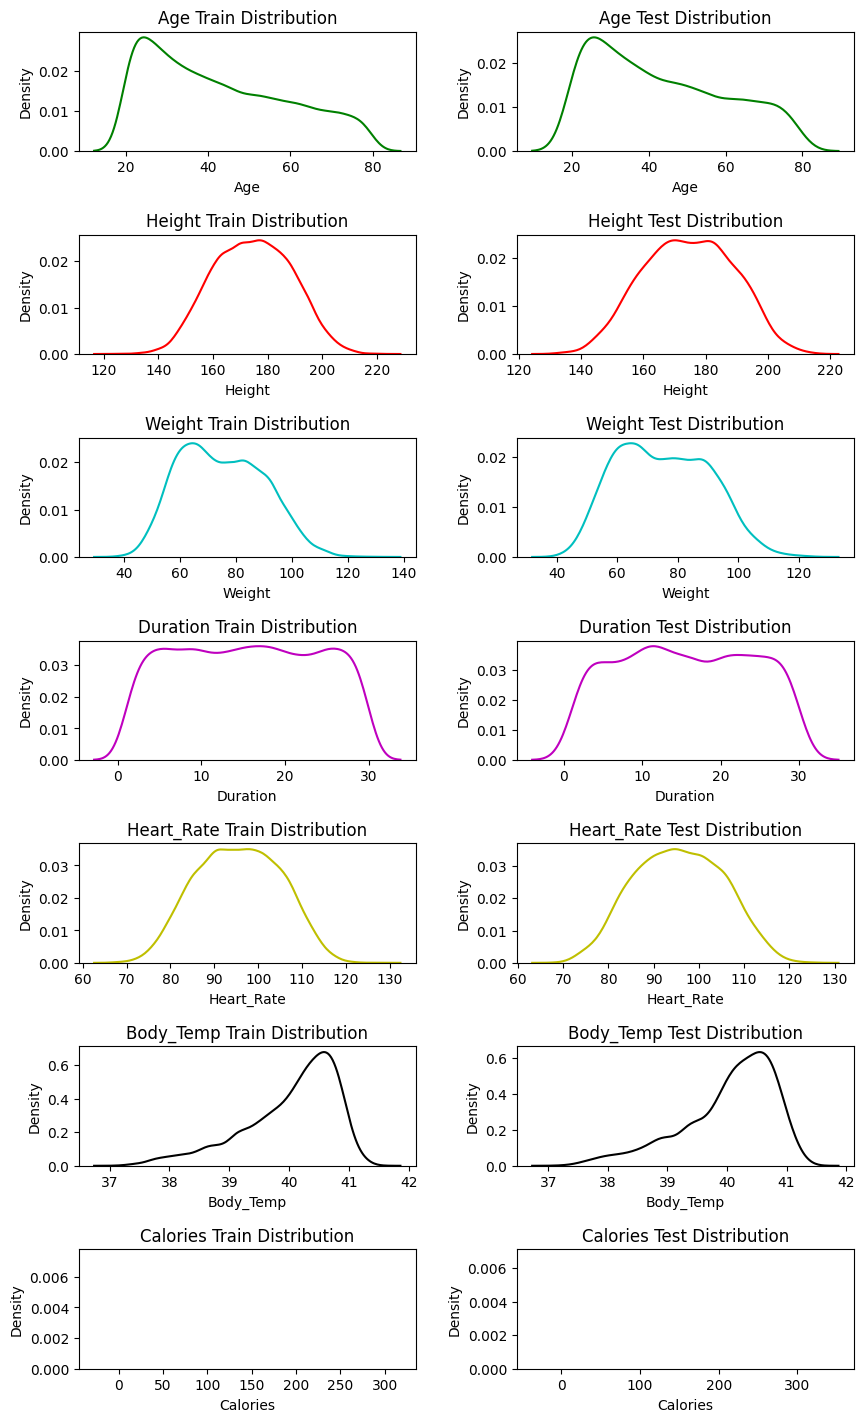

In [ ]:

c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(exercise_train_data.columns) , 2 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension

for i , column , color in zip(range(0 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.columns , c):
  try:
    axes[i].title.set_text(column + " Train Distribution")
    sns.kdeplot(data = exercise_train_data , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue

for i , column , color in zip(range(1 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.columns , c):
  try:
    axes[i].title.set_text(column + " Test Distribution")
    sns.kdeplot(data = exercise_test_data , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue

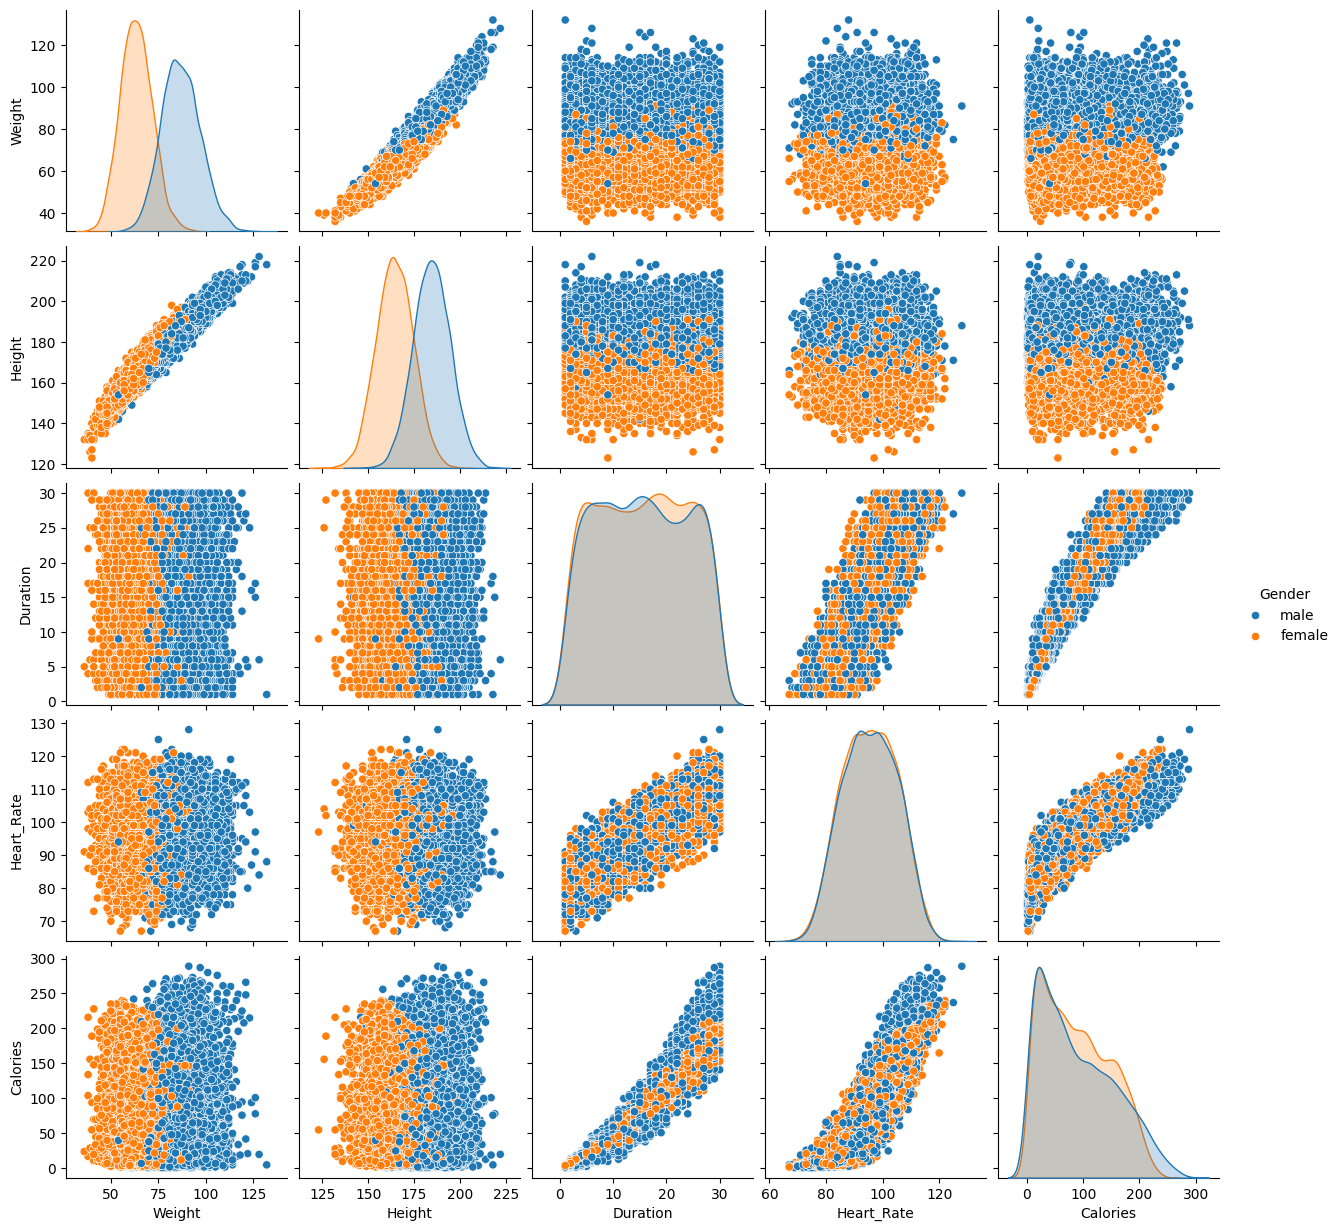

In [ ]:
sns.pairplot(exercise_train_data[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")


**Separate Categorical and Numerical Features**

In [ ]:
print('Minimum age in dataset is : ' , exercise_train_data["Age"].min())
print('Maximum age in dataset is : ' , exercise_train_data["Age"].max())

Minimum age in dataset is :  20
Maximum age in dataset is :  79


In [ ]:
age_groups = ["Young" , "Middle-Aged" , "Old"]
exercise_train_data["age_groups"] = pd.cut(exercise_train_data["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)
exercise_train_data["age_groups"].head()

2643             Old
13352            Old
13117            Old
2560             Old
14297    Middle-Aged
Name: age_groups, dtype: category
Categories (3, object): ['Young' < 'Middle-Aged' < 'Old']

In [ ]:
exercise_train_data["age_groups"].value_counts()

age_groups
Young          6029
Middle-Aged    3535
Old            2436
Name: count, dtype: int64

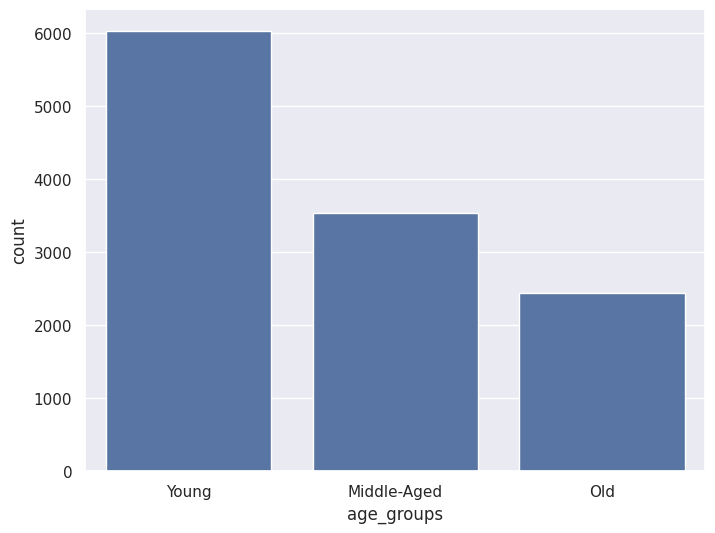

In [ ]:
sns.set(rc={"figure.figsize": (8, 6)})  # Setting figure size
sns.countplot(data=exercise_train_data, x="age_groups")
plt.show()  # Display the plot

In [ ]:
fig = px.box(exercise_train_data , x= "age_groups" , y = "Calories" , color = "Gender")

fig.update_layout(
    width=700,
    height=450,
)

fig.show()

In [ ]:
fig = px.box(exercise_train_data , x= "age_groups" , y = "Duration" , color = "Gender")

fig.update_layout(
    width=750,
    height=450,
)

fig.show()

In [ ]:
print("dataset's median exercise duration in mins: " ,  exercise_train_data["Duration"].median())
print("dataset's mean exercise duration in mins: " ,  exercise_train_data["Duration"].mean())

dataset's median exercise duration in mins:  16.0
dataset's mean exercise duration in mins:  15.520083333333334


In [ ]:
cat_col = df.select_dtypes(include=['object']).columns.tolist()
cat_col

['Gender']

In [ ]:
df["Gender"].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [ ]:
pd.get_dummies(df["Gender"],drop_first=True)

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


In [ ]:
categorical = df[cat_col]
categorical.head()

,Gender
0,male
1,female
2,male
3,female
4,female


<Axes: xlabel='Gender', ylabel='count'>

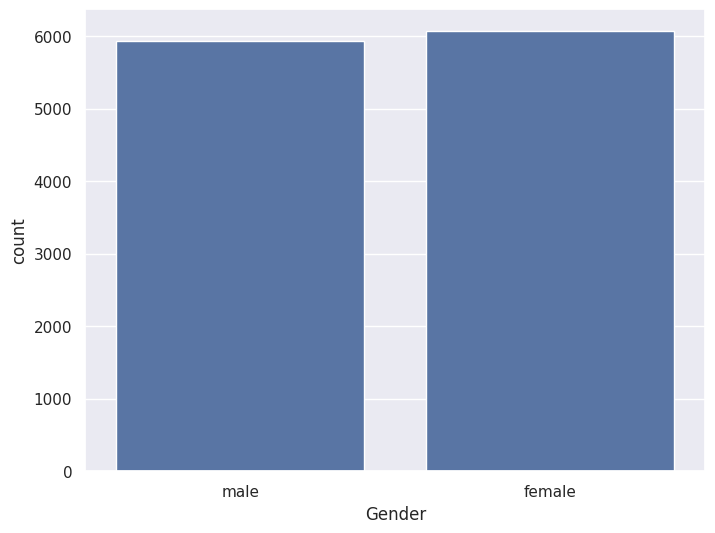

In [ ]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.countplot(data = exercise_train_data , x = "Gender")

In [ ]:
fig = px.box(exercise_train_data , x= "Gender" , y = "Duration")

fig.update_layout(
    width=700,
    height=450,
)

fig.show()

In [ ]:
Num_col = [col for col in df.columns if df[col].dtype != "O"]
Num_col

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [ ]:
df[Num_col].shape

(15000, 7)

In [ ]:
Numerical = df[Num_col]
Numerical.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
Numerical.shape

(15000, 7)

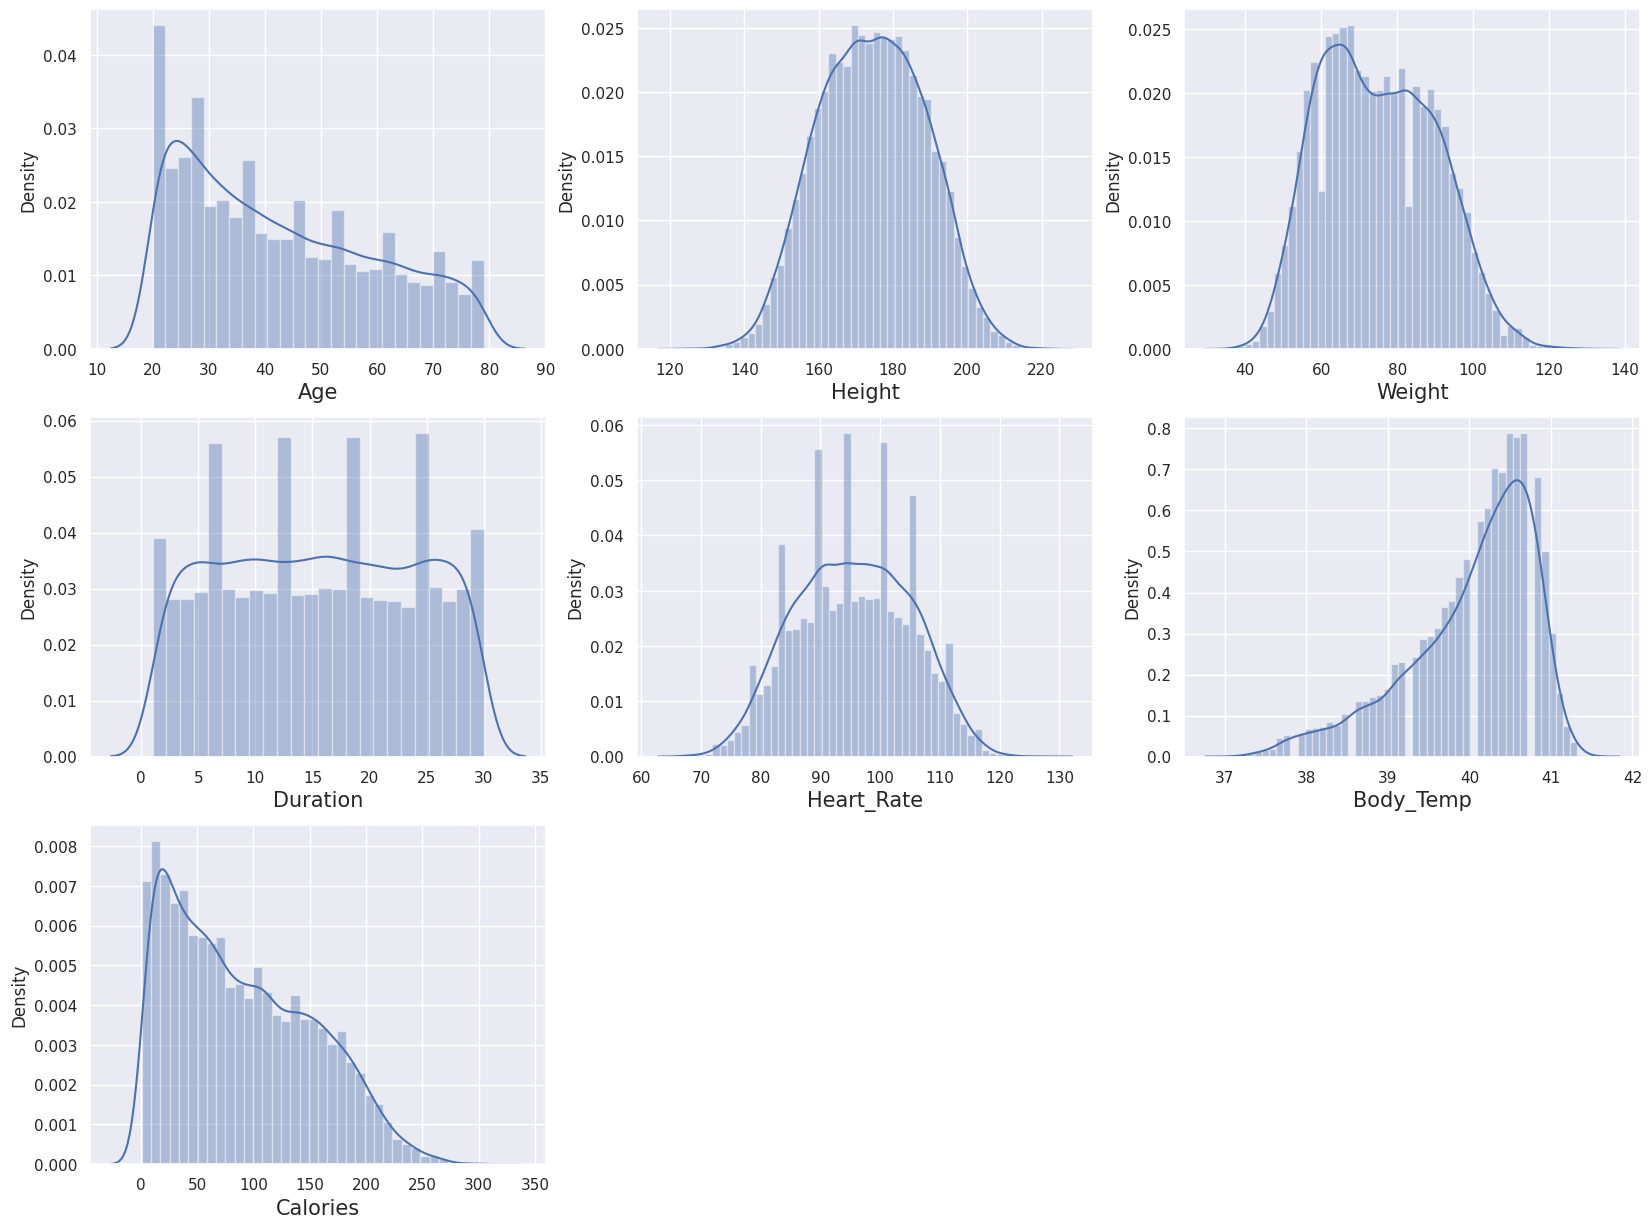

In [ ]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

<Axes: >

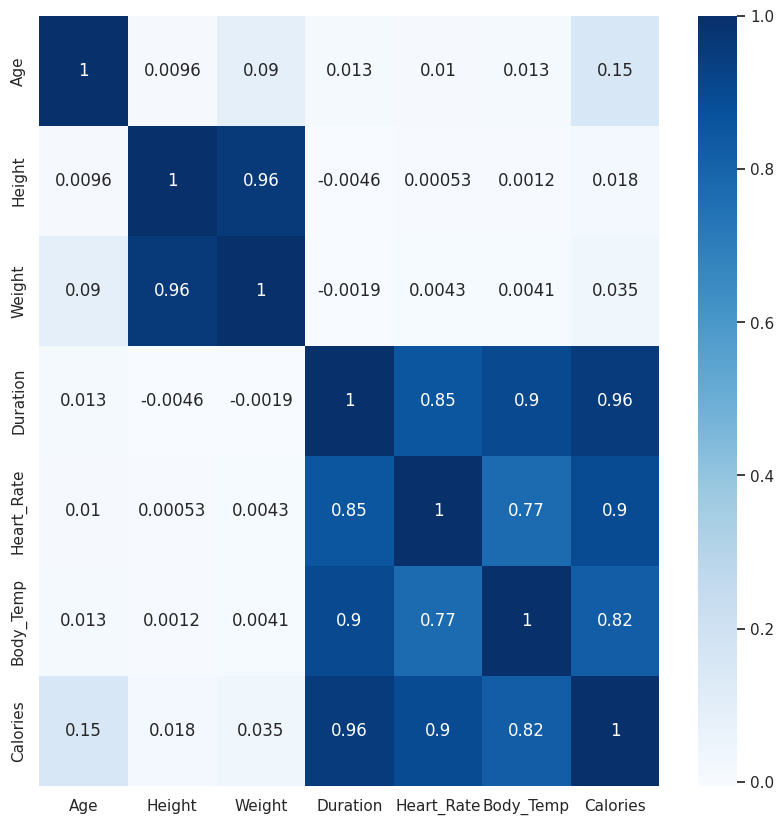

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

In [ ]:
for data in [exercise_train_data , exercise_test_data]:         # adding BMI column to both training and test sets
  data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
  data["BMI"] = round(data["BMI"] , 2)


In [ ]:
bmi_category = [
    "Very severely underweight",
    "Severely underweight",
    "Underweight",
    "Normal",
    "Overweight",
    "Obese Class I",
    "Obese Class II",
    "Obese Class III"
]

exercise_train_data["Categorized_BMI"] = pd.qcut(exercise_train_data["BMI"], q=[0, 0.005, 0.025, 0.135, 0.68, 0.95, 0.99, 0.995, 1], labels=bmi_category)

exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object")  # Converting 'categorical' dtype into 'object' dtype for "Categorized_BMI" column

exercise_train_data.head()


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI,Categorized_BMI
2643,male,62,172.0,81.0,14.0,88.0,40.5,68.0,Old,27.38,Obese Class I
13352,male,77,182.0,83.0,28.0,108.0,40.8,241.0,Old,25.06,Normal
13117,female,73,170.0,71.0,16.0,91.0,40.2,83.0,Old,24.57,Normal
2560,male,76,176.0,81.0,24.0,94.0,40.7,154.0,Old,26.15,Overweight
14297,male,42,183.0,77.0,7.0,93.0,39.8,32.0,Middle-Aged,22.99,Normal


In [ ]:
ds = exercise_train_data["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized_BMI" , "Count"]
ds

,Categorized_BMI,Count
0,Normal,6562
1,Overweight,3227
2,Underweight,1327
3,Obese Class I,463
4,Severely underweight,241
5,Obese Class II,71
6,Very severely underweight,63
7,Obese Class III,46


In [ ]:
ds =exercise_train_data[["Gender" ,"Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["Gender" , "Categorized_BMI"])
ds.columns = ["Gender" , "Categorized_BMI" , "Count"]
ds


,Gender,Categorized_BMI,Count
0,female,Normal,4078
11,female,Obese Class I,3
5,female,Overweight,370
6,female,Severely underweight,241
3,female,Underweight,1313
8,female,Very severely underweight,63
2,male,Normal,2484
4,male,Obese Class I,460
7,male,Obese Class II,71
9,male,Obese Class III,46


<Axes: xlabel='Categorized_BMI', ylabel='Count'>

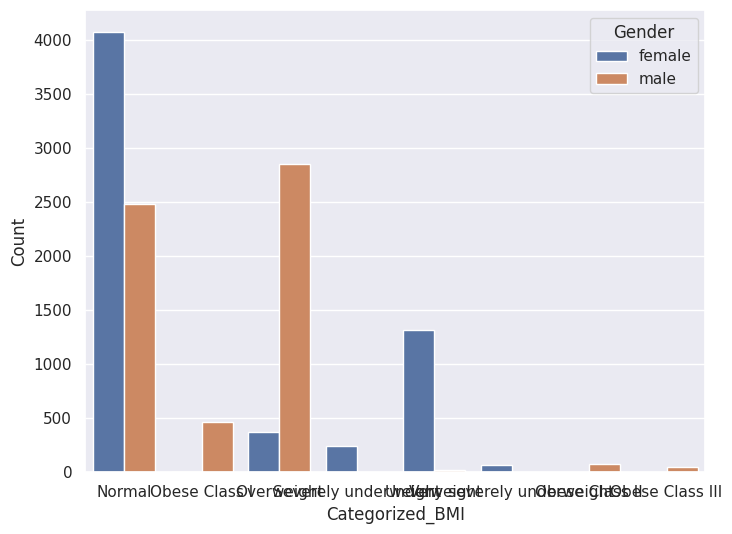

In [ ]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count" , hue = "Gender")

In [ ]:
ds =exercise_train_data[["age_groups" ,"Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["age_groups" , "Categorized_BMI"])
ds.columns = ["age_groups" , "Categorized_BMI" , "Count"]
ds

,age_groups,Categorized_BMI,Count
0,Young,Normal,3424
12,Young,Obese Class I,102
21,Young,Obese Class II,6
22,Young,Obese Class III,3
2,Young,Overweight,1389
9,Young,Severely underweight,179
5,Young,Underweight,873
13,Young,Very severely underweight,53
1,Middle-Aged,Normal,1939
10,Middle-Aged,Obese Class I,163


**Learning Curve**

In [ ]:
from sklearn.metrics import mean_squared_error

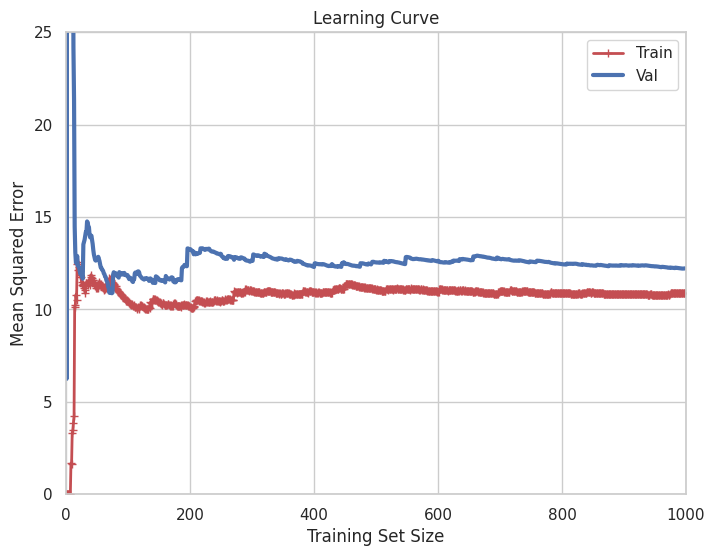

In [ ]:
train_errors , val_errors = [] , []
def plot_learning_curve(model):
  for m in range(1 , 1000):
    model.fit(X_train[:m] , y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_test[:m])
    train_errors.append(mean_squared_error(y_train[:m] , y_train_predict))
    val_errors.append(mean_squared_error(y_test[:m] , y_val_predict))

  plt.plot(np.sqrt(train_errors) , "r-+" , linewidth = 2 , label = "Train")
  plt.plot(np.sqrt(val_errors) , "b-" , linewidth = 3 , label = "Val")
  plt.title("Learning Curve")
  plt.xlabel("Training Set Size")
  plt.ylabel("Mean Squared Error")
  plt.xlim([0 , 1000])
  plt.ylim([0 , 25])
  plt.legend()
linreg = LinearRegression()
plot_learning_curve(linreg)

**Concatenate Categorical and Numerical**

In [ ]:
data = pd.concat([categorical,Numerical],axis=1)

In [ ]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

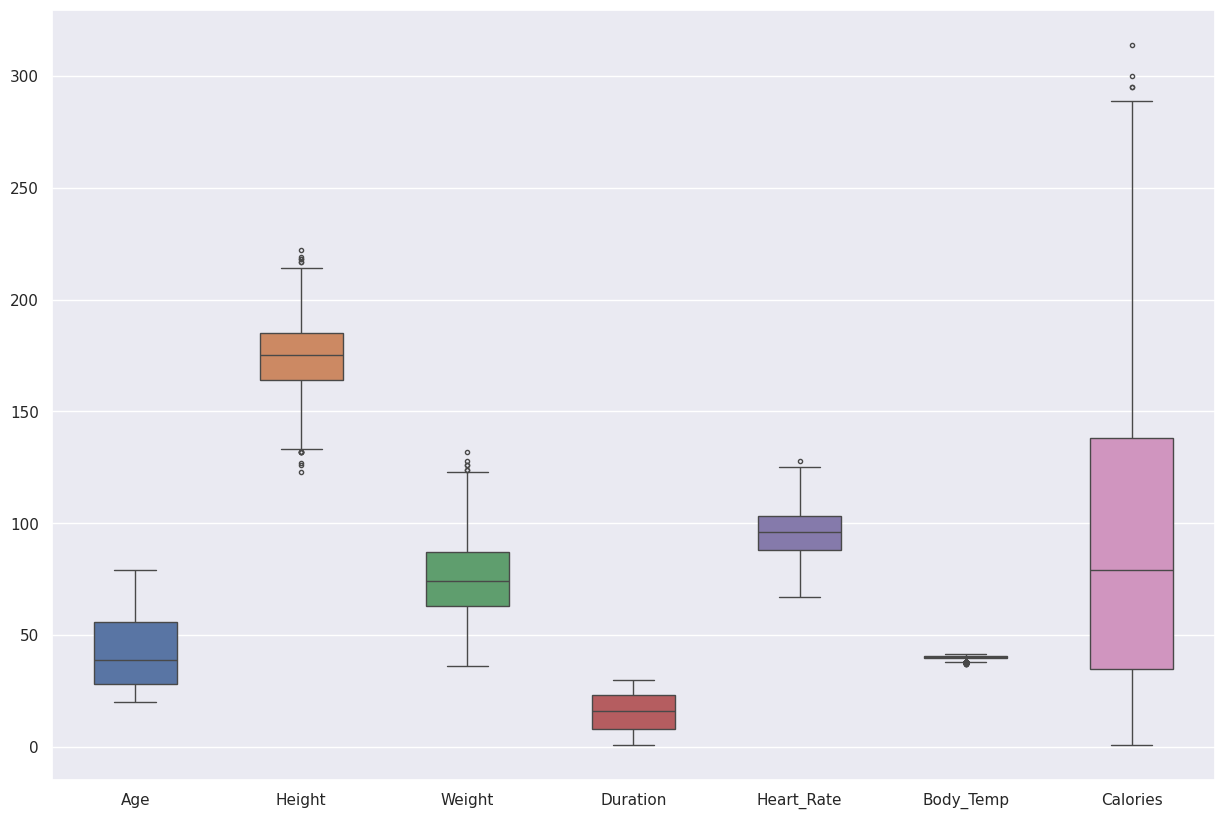

In [ ]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)

**Model Building**

In [ ]:
data.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
X = data.drop(columns = ["Calories"],axis = 1)
y = data["Calories"]

In [ ]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)


In [ ]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (12000, 7)
Shape of X Test:  (3000, 7)
Shape of y Train:  (12000,)
Shape of y Test:  (3000,)


In [ ]:
def predict(ml_model, X_train, X_test, y_train, y_test):
    model = ml_model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    print(f'Score: {train_score}')

    y_prediction = model.predict(X_test)
    print('Predictions are:\n', y_prediction)
    print()

    r2_score = metrics.r2_score(y_test, y_prediction)
    print(f'R2 Score: {r2_score}')

    mae = metrics.mean_absolute_error(y_test, y_prediction)
    print(f'MAE: {mae}')

    mse = metrics.mean_squared_error(y_test, y_prediction)
    print(f'MSE: {mse}')

    rmse = np.sqrt(mse)
    print(f'RMSE: {rmse}')

    sns.distplot(y_test - y_prediction)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])

**Linear Regression**

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train , y_train)
linreg_prediction = linreg.predict(X_test)


In [ ]:
print("Linear Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , linreg_prediction) , 2))
print("Linear Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , linreg_prediction) , 2))
print("Linear Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , linreg_prediction)) , 2))


Linear Regression Mean Absolute Error(MAE) :  8.48
Linear Regression Mean Squared Error(MSE) :  138.12
Linear Regression Root Mean Squared Error(RMSE) :  11.75


Score: 0.967592555473578
Predictions are:
 [198.81182363  80.43555305 194.40940033 ...  22.14745631 118.63504926
 -11.98134672]

R2 Score: 0.9655977245826504
MAE: 8.479071745987955
MSE: 138.12408611460899
RMSE: 11.752620393538157


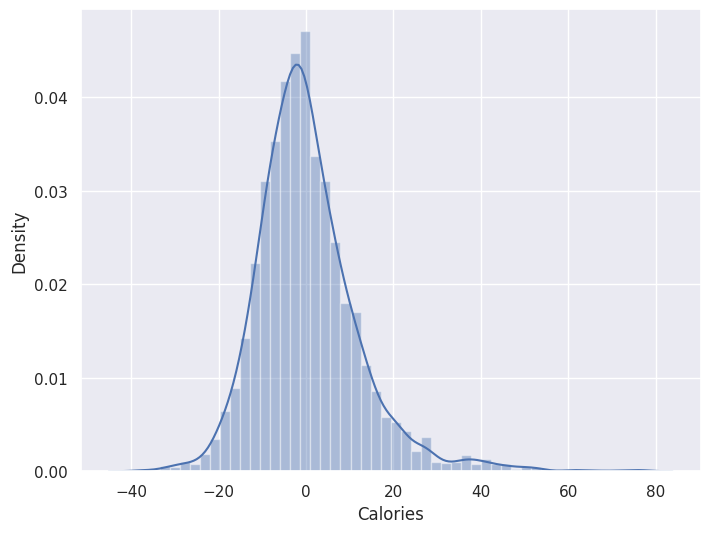

In [ ]:
predict(LinearRegression(), X_train, X_test, y_train, y_test)

**XGB Regressor**

Score: 0.9995380557081355
Predictions are:
 [197.06581   70.867226 196.99498  ...  29.043041 104.09284   14.61472 ]

R2 Score: 0.9986863132331905
MAE: 1.5521575984954834
MSE: 5.2744122853837005
RMSE: 2.2966088664340956


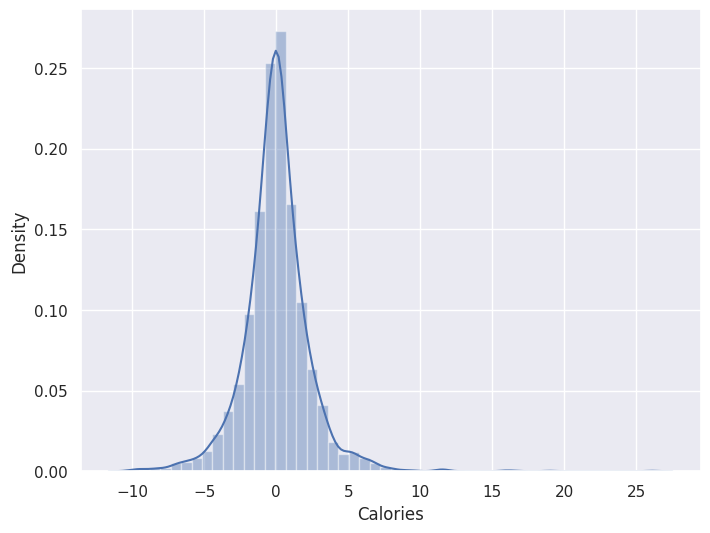

In [ ]:
predict(XGBRegressor(), X_train, X_test, y_train, y_test)

**DecisionTree Regression**

Score: 1.0
Predictions are:
 [194.  75. 206. ...  30. 109.  15.]

R2 Score: 0.9924265925079325
MAE: 3.5063333333333335
MSE: 30.407
RMSE: 5.514254256016855


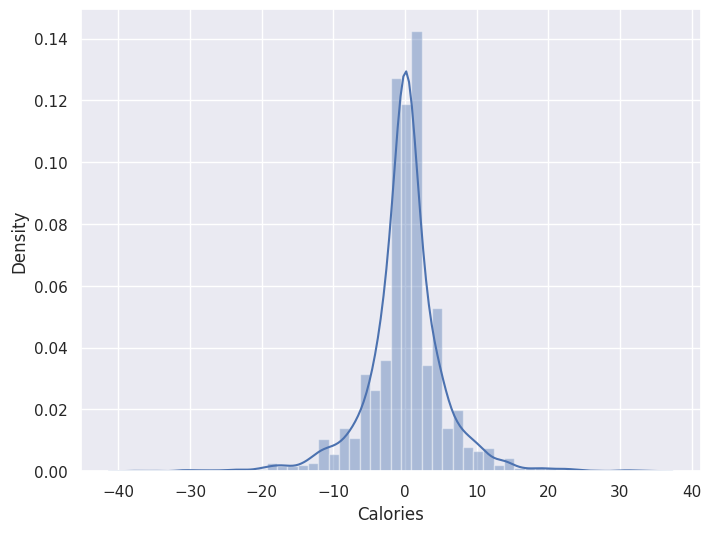

In [ ]:
predict(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

**RandomForest Regression**

In [ ]:
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(X_train , y_train)
random_reg_prediction = random_reg.predict(X_test)

In [ ]:
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))


RandomForest Mean Absolute Error(MAE) :  5.44
RandomForest Mean Squared Error(MSE) :  71.05
RandomForest Root Mean Squared Error(RMSE) :  8.43


Score: 0.9996767266090387
Predictions are:
 [197.04  66.55 196.26 ...  27.76 111.58  14.27]

R2 Score: 0.9975980724895278
MAE: 1.8348866666666666
MSE: 9.643665666666667
RMSE: 3.1054251990132795


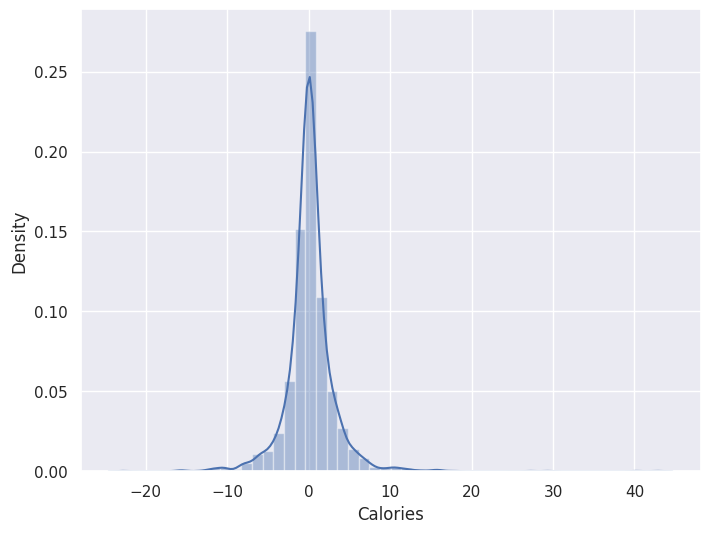

In [ ]:
predict(RandomForestRegressor(), X_train, X_test, y_train, y_test)


**Fitness Trackers Market Analysis**

In [ ]:
!pip install pyscrappy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
import missingno as msno
import altair as alt


In [ ]:
df3 = pd.read_csv("/content/Fitness_trackers.csv")
df3


,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,"2,499","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,"2,099","2,499",AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,"1,722","2,099",LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,"2,469","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,"1,799","2,199",OLED Display,4.3,Plastic,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
560,Huawei,Smartwatch,Watch 36456,Black,"55,000","55,000",AMOLED Display,4.1,Silicone,14,NaN
561,Huawei,Smartwatch,GT Fortuna-B19S Sport,Black,"13,990","20,990",AMOLED Display,4.1,Elastomer,14,NaN
562,GOQii,FitnessBand,HR,Black,"1,999","1,999",OLED Display,3.8,Silicone,7,NaN
563,GOQii,FitnessBand,Vital,Black,"3,499","3,499",OLED Display,3.7,Thermoplastic polyurethane,7,NaN


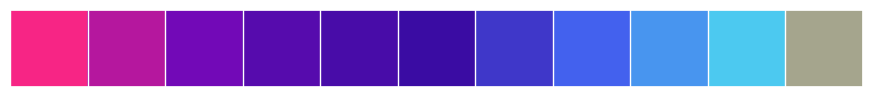

In [ ]:
colors = ["#F72585","#B5179E","#7209B7","#560BAD","#480CA8","#3A0CA3",\
"#3F37C9","#4361EE","#4895EF","#4CC9F0","#a5a58d"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =1)
plt.show()

**Exploratory Data Analysis(EDA)**

In [ ]:
df.shape

(15000, 8)

In [ ]:
df.dtypes


Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,42.789800,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,15.530600,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,40.025453,0.779230,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


**Missing Values in Dataset**

<Axes: >

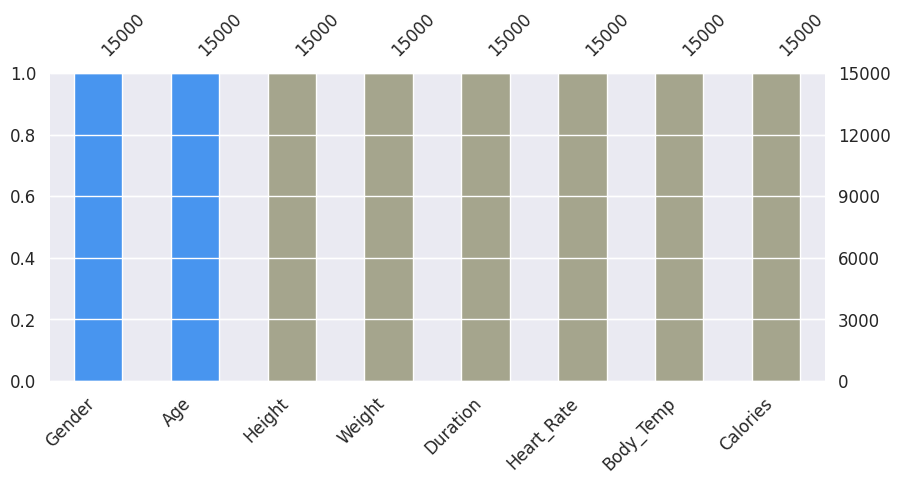

In [ ]:
color=['#4895ef','#4895ef','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d','#a5a58d']
msno.bar(df,figsize=(10,4), color=color,fontsize=12,sort="ascending")

**Demand for fitness trackers**

In [ ]:
df3['Brand Name'].groupby(df3['Device Type']).count().sort_values(ascending=False)

Device Type
Smartwatch     490
FitnessBand     75
Name: Brand Name, dtype: int64

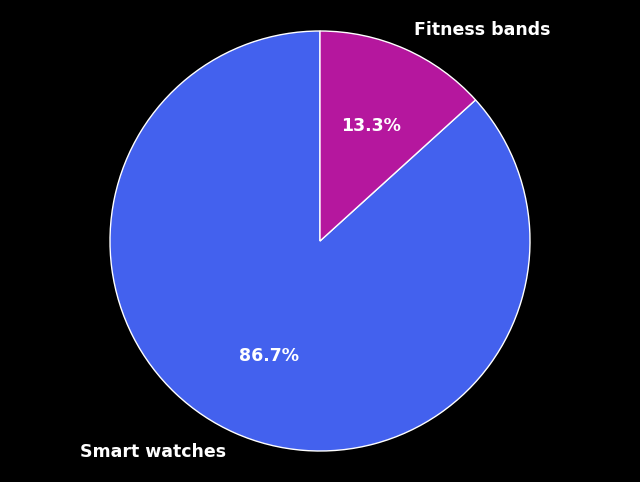

In [ ]:
labels = 'Smart watches', 'Fitness bands'
sizes = [490,75]
fig1, ax1 = plt.subplots()
fig1.set_facecolor('black')
ax1.pie(sizes, labels=labels, colors=["#4361EE",'#b5179e'],autopct='%1.1f%%', startangle=90,textprops={'color':'w','weight':'bold','fontsize':12.5})
ax1.axis('equal')
plt.show()

**Number of Players in the market**

In [ ]:
df3['Brand Name'].groupby(df3['Brand Name']).count().sort_values(ascending=False).iloc[:5]

Brand Name
FOSSIL      133
GARMIN      101
APPLE        86
FitBit       51
SAMSUNG      48
Name: Brand Name, dtype: int64

**Which are the top 5 brands for fitness bands and smart watches?**

<Axes: xlabel='count', ylabel='Brand Name'>

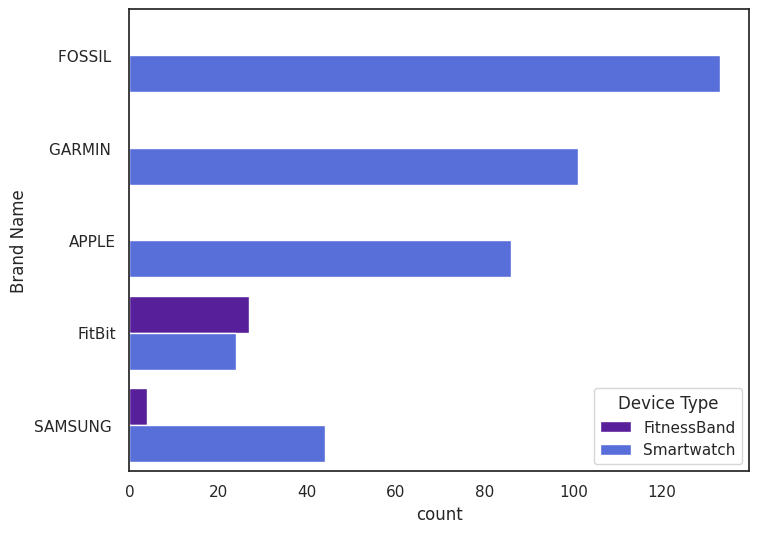

In [ ]:
sns.set_style('white')
sns.countplot(y="Brand Name", hue="Device Type", data=df3, palette=["#560bad","#4361EE"],
              order=df3["Brand Name"].value_counts().iloc[:5].index)

**Which brand has the highest number of products?**

In [ ]:
df3['Device Type'].groupby(df3['Brand Name']).count().sort_values(ascending=False).iloc[:1]

Brand Name
FOSSIL     133
Name: Device Type, dtype: int64

**Are fitness trackers with higher ratings more expensive?**

In [ ]:
round(df3.groupby('Brand Name')['Rating (Out of 5)'].mean().sort_values(ascending=False).iloc[:10],1)

Brand Name
APPLE       4.5
OnePlus     4.3
FOSSIL      4.2
SAMSUNG     4.2
Honor       4.2
FitBit      4.2
Xiaomi      4.2
Huawei      4.2
huami       4.2
realme      4.1
Name: Rating (Out of 5), dtype: float64

<Axes: xlabel='Rating (Out of 5)', ylabel='Selling Price'>

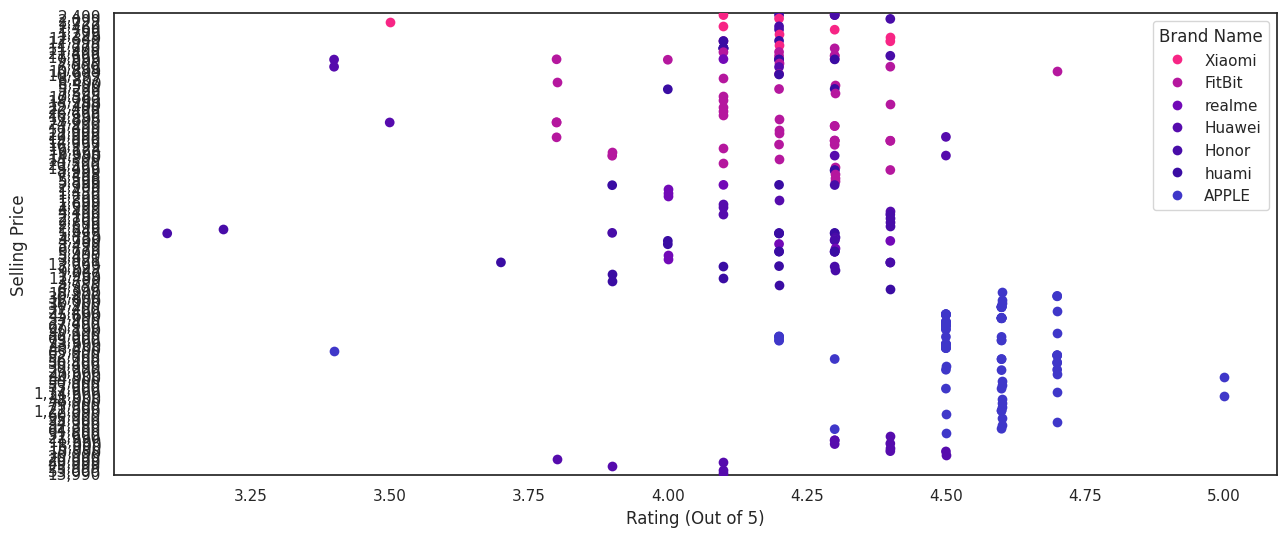

In [ ]:
list_of_brands = ["APPLE", "OnePlus", "FOSSIL", "SAMSUNG", "Honor", "FitBit", "Xiaomi", "Huawei", "huami", "realme"]

df_f = df3[df3["Brand Name"].isin(list_of_brands)]

fig, ax = plt.subplots(figsize=(15, 6))
sns.stripplot(x="Rating (Out of 5)", y="Selling Price", data=df_f, hue="Brand Name", palette=colors, size=7, marker="o", ax=ax)


**Do expensive fitness trackers have a better battery performance?**

In [ ]:
round(df3.groupby('Brand Name')['Average Battery Life (in days)'].mean(),0).sort_values(ascending=False)

Brand Name
GARMIN      17.0
huami       16.0
Oppo        14.0
Honor       12.0
Xiaomi      12.0
SAMSUNG     12.0
Huawei      11.0
realme      10.0
OnePlus      9.0
boAt         8.0
FitBit       7.0
GOQii        7.0
LAVA         7.0
Noise        7.0
LCARE        6.0
Fastrack     6.0
Noise        5.0
FOSSIL       5.0
Infinix      4.0
APPLE        1.0
Name: Average Battery Life (in days), dtype: float64

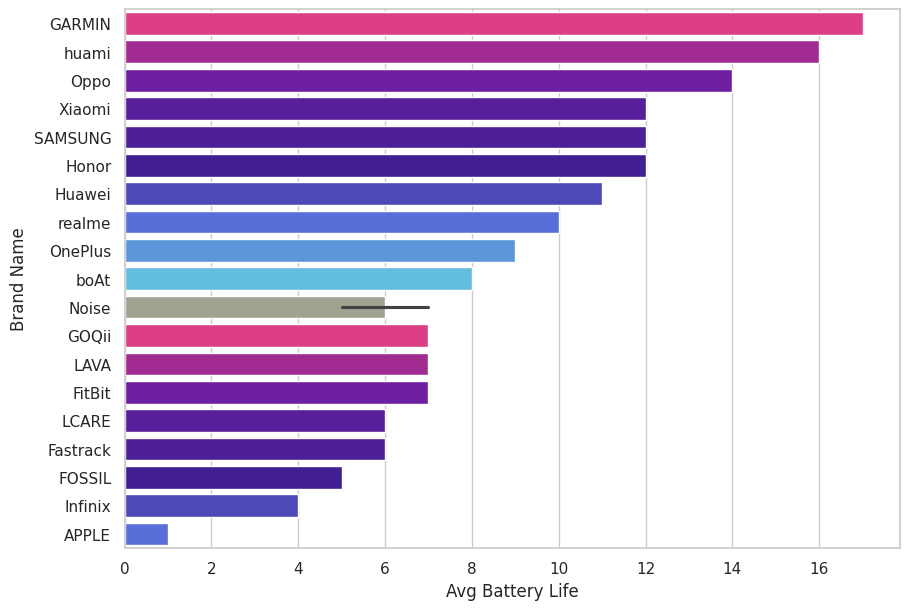

In [ ]:
data = {
    "Brand Name": ["GARMIN", "huami", "Oppo", "Xiaomi", "SAMSUNG", "Honor", "Huawei", "realme", "OnePlus", "boAt", "Noise", "GOQii", "LAVA", "FitBit", "LCARE", "Fastrack", "FOSSIL", "Noise", "Infinix", "APPLE"],
    "Avg Battery Life": [17.0, 16.0, 14.0, 12.0, 12.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 1.0]
}

df_batt = pd.DataFrame(data)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
sns.barplot(x="Avg Battery Life", y="Brand Name", data=df_batt, palette=colors)
plt.show()


**Box plot to denote average selling prices**

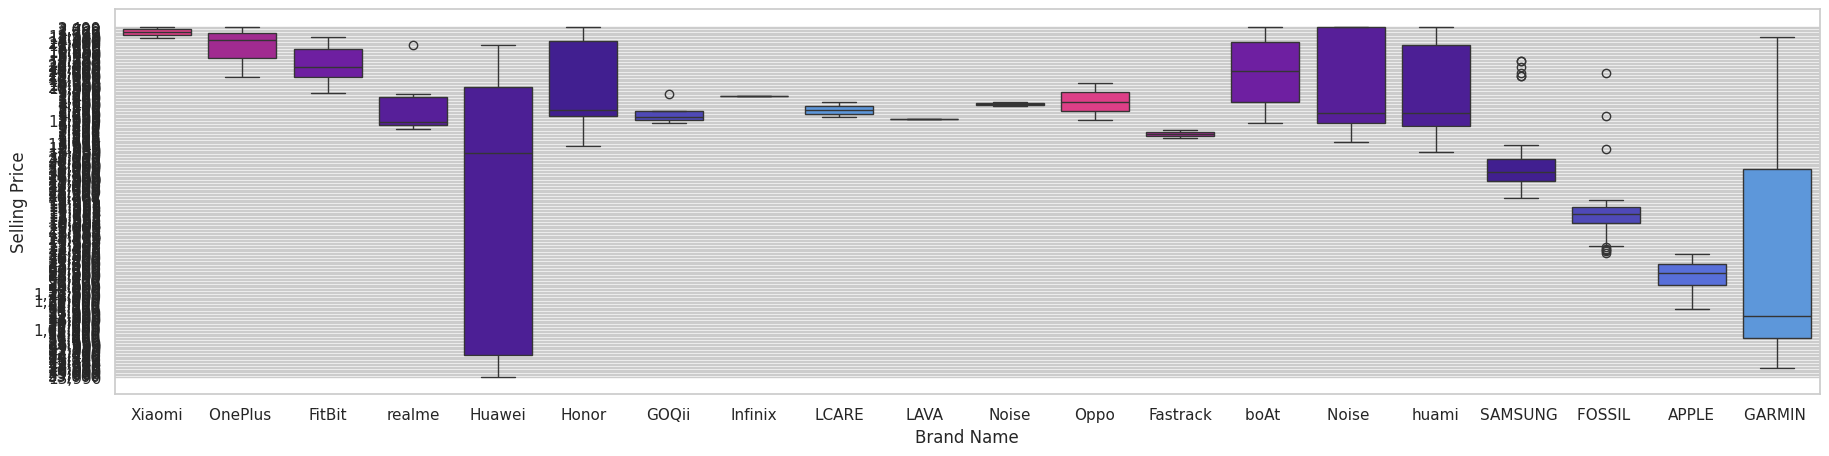

In [ ]:
fig, ax = plt.subplots(figsize=(22,5))
ax = sns.boxplot(x="Brand Name", y="Selling Price", data=df3,palette=colors)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Elbow method to find the optimal number of clusters**

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
for i in df3.columns:
    df3[i] = labelencoder_X.fit_transform(df3[i])

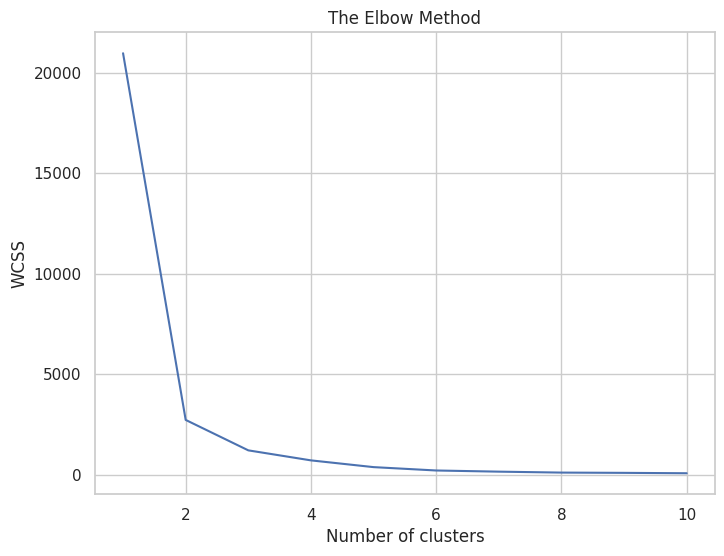

In [ ]:
X = df3.iloc[:, [0,1]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**K-Means Clustering**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 20)
y_kmeans = kmeans.fit_predict(df3[['Brand Name','Display','Rating (Out of 5)']])
kmeans.fit(df3)
df3['Cluster'] = kmeans.labels_

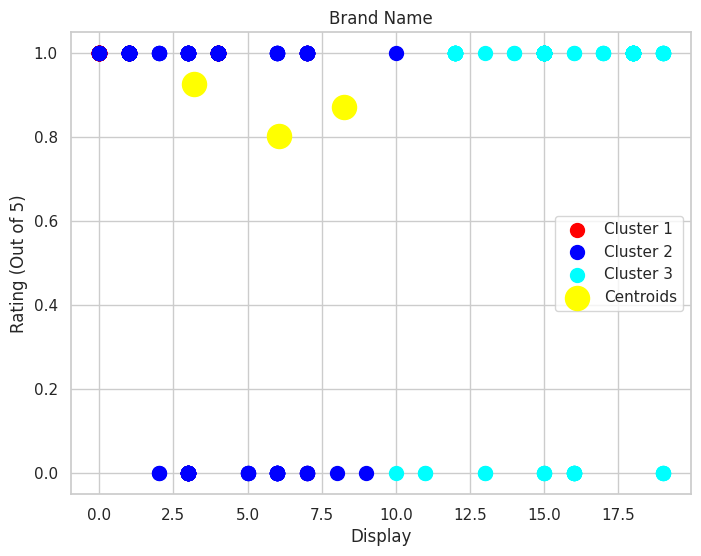

In [96]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Brand Name')
plt.xlabel('Display')
plt.ylabel('Rating (Out of 5)')
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go
PLOT = go.Figure()
for C in list(df3.Cluster.unique()):

    PLOT.add_trace(go.Scatter3d(x = df3[df3.Cluster == C]['Brand Name'],
                                y = df3[df3.Cluster == C]['Display'],
                                z = df3[df3.Cluster == C]['Rating (Out of 5)'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Brand Name', titlefont_color = 'pink'),
                                yaxis=dict(title ='Display' , titlefont_color = 'pink'),
                                zaxis=dict(title = 'Rating (Out of 5)', titlefont_color = 'pink')),
                   font = dict(family = "Gilroy", color  = 'black', size = 10))
